# Twitter Data Collection and Processing

For this demo we assume that you followed the instruction in the python installation guideline and have a running conda installation. Additionally, please make sure that basic data science packages (e.g., numpy and pandas) are installed.

We will go through the following steps in this notebook:

    1) Collecting tweets related to "vaccine"

    2) Analyzing trends about "vaccine"

    3) Building a network by processing these tweets

**Note:** Due to the rate limits of twitter(https://developer.twitter.com/en/docs/twitter-api/rate-limits), we turn to an non-official twitter crawler. We need to install the following python packages:

> ```pip3 install twint```
https://github.com/twintproject/twint


**Data File:** Please refer to this google drive link.

"tweets_full.zip" and "tweets_1127_1130.csv" can be downloaded from https://drive.google.com/drive/folders/1eDYECK9UnDqhuy7KkA6ISK4w8mD18GdQ?usp=sharing 

--------

## 1. Data Collection

We collected tweets by using the keyword "vaccine". The first news about phase-3-vaccine https://www.pfizer.com/news/press-release/press-release-detail/pfizer-and-biontech-announce-vaccine-candidate-against 
came out at 2020-11-09, and before that, the efficiency of vaccine remained unclear to the public. At that time, the discussion of vaccination and anti-vaccination had not yet started, or at least less popular. Thus we set the post time of twittes from 2020-11-01 till now.

### 1.1 Code for Crawling Tweets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
'''
import twint

c = twint.Config()
c.Search = "vaccine"
c.Since = '2020-11-01'

c.Store_csv = True
c.Output = "./data/tweets_full.csv"

twint.run.Search(c)
'''
# These codes would run for more than ten hours via a single PC. 
# I opened five cloud computers, and assigned each with a task dividing by date.
# tweets_full.csv is ~5GB, and it is included in the above google drive link.

'\nimport twint\n\nc = twint.Config()\nc.Search = "vaccine"\nc.Since = \'2020-11-01\'\n\nc.Store_csv = True\nc.Output = "./data/tweets_full.csv"\n\ntwint.run.Search(c)\n'

### 1.2 Data Cleaning

This dataset contains 10024090 tweets which belongs to 2750470 user. It takes too much time and memory to load this dataset as a dataframe, so we only shows the first 100000 rows in this section as an example.

In [5]:
# replace this line to you file location
filename = '/home/morris/CodeDemo/tweets_full.csv'
df = pd.read_csv(filename, sep = ',', error_bad_lines=False, nrows=100000)

# remove irrelevant fields
df.drop([ 'retweet', 'near', 'geo','source','user_rt_id', 'user_rt','retweet_id', 
        'retweet_date', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

indexNames = df[df['date'] == "2021-01-09"].index
df.drop(indexNames, axis=0, inplace=True)

df = df.dropna(axis = 0, subset = ['date'] )
indexNames_1 = df[df['date'].str.len() != 10].index
df.drop(indexNames_1, axis=0, inplace=True)

# df.to_csv("tweets_full_filted.csv", index=False)

/home/morris/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,9,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 1.3 Statistic Information of Tweet Data

In [6]:

column_name = df.columns.values.tolist()
unique_conversation = df['conversation_id'].drop_duplicates(keep='first', inplace=False)
unique_lang = df['language'].drop_duplicates(keep='first', inplace=False)

print("Data Set Information")
print("Number of fields of this data set:", len(column_name))
print("Fields: ", column_name)
print("Number of tweets: ", df.shape[0])
print("Number of conversation: ", len(unique_conversation))
print("Number of language: ", len(unique_lang))

print(df.info(verbose=True, null_counts = True))

Data Set Information
Number of fields of this data set: 25
Fields:  ['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link', 'quote_url', 'video', 'thumbnail', 'reply_to']
Number of tweets:  99999
Number of conversation:  55405
Number of language:  44
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               99999 non-null  object 
 1   conversation_id  99999 non-null  object 
 2   created_at       99999 non-null  object 
 3   date             99999 non-null  object 
 4   time             99999 non-null  object 
 5   timezone         99999 non-null  int64  
 6   user_id          99999 non-null  int64  
 7   username         99999 non-null  obj

Number of user:  75420
Number of users who posted more than 1 tweet:  12991
Number of users who posted more than 10 tweet:  183


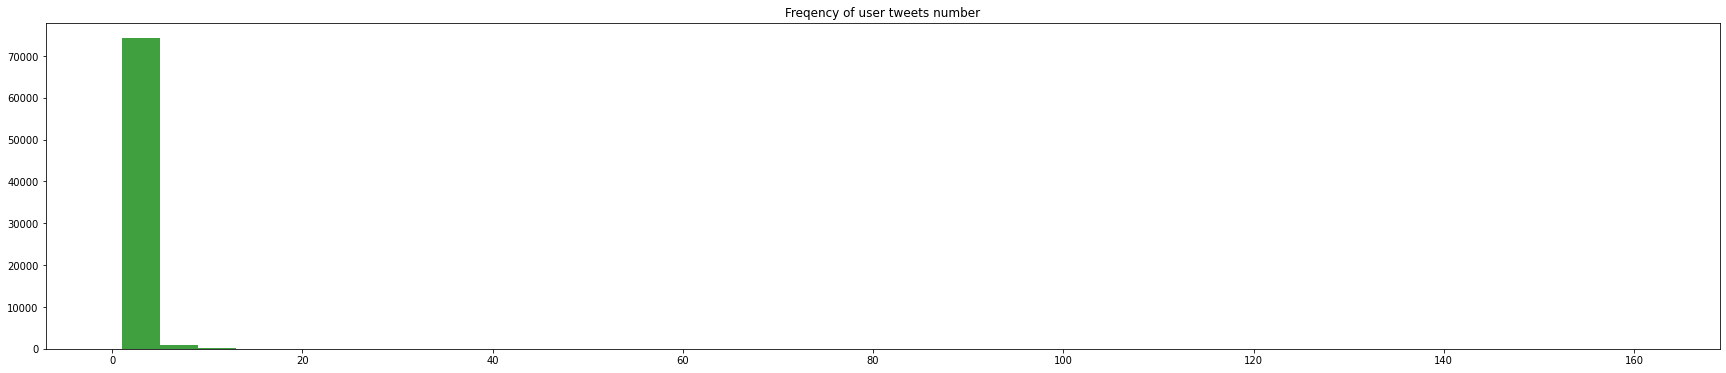

In [10]:

import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

unique_user_id = df['user_id'].drop_duplicates(keep='first', inplace=False)
unique_user_id = unique_user_id.to_numpy()
freq = df.username.value_counts()
print("Number of user: ", len(unique_user_id))
print("Number of users who posted more than 1 tweet: ", len(freq[freq > 1]))
print("Number of users who posted more than 10 tweet: ", len(freq[freq > 10]))

plt.hist(np.array(freq.tolist()), bins=40, color='green', histtype='stepfilled', alpha=0.75)
plt.title("Freqency of user tweets number")
plt.show()

## 2. Analyzing Trends about Vaccine

### 2.1 Vaccine - Daily Twitter Trend

In [11]:

trend_of_day = df.date.value_counts()
trend_of_day = trend_of_day.sort_index()
trend_of_day.to_csv("daily_trend.csv")

# a bit slow.

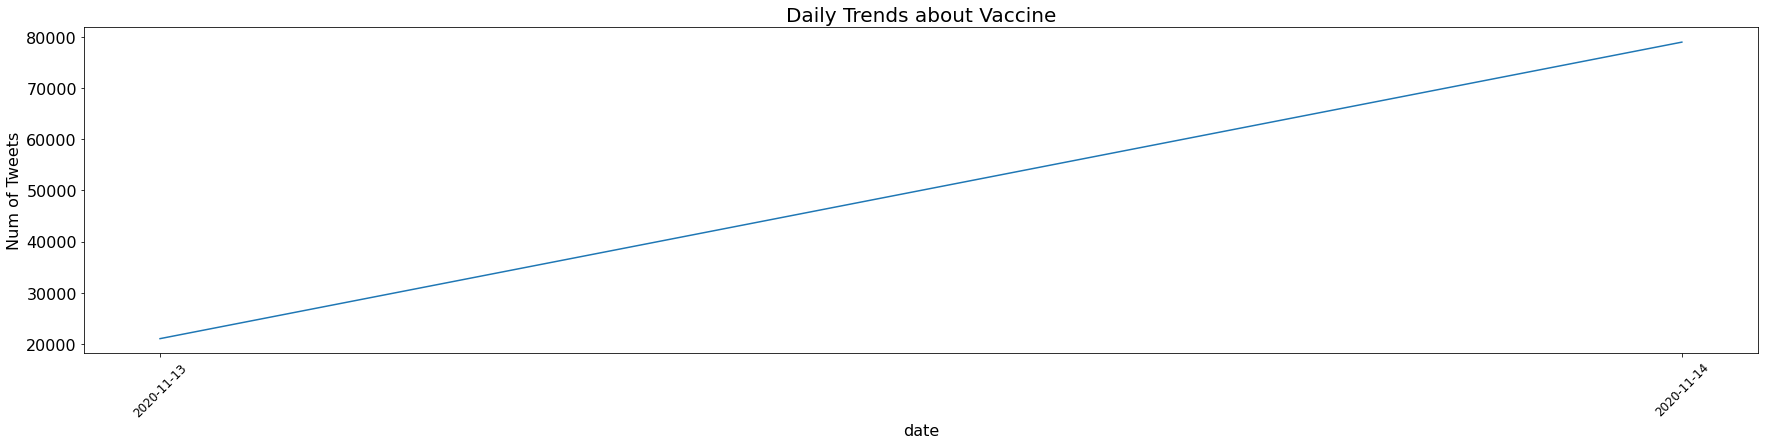

In [12]:
trend_of_day = pd.read_csv('daily_trend.csv')
trend_of_day.columns = ['date', 'NumTweets']

plt.rcParams["figure.figsize"] = (30, 6)
plt.plot(trend_of_day['date'], trend_of_day['NumTweets'])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=16)
plt.xlabel("date", fontsize=16)
plt.ylabel("Num of Tweets", fontsize=16)
plt.title("Daily Trends about Vaccine", fontsize=20)
plt.show()


The first peak came with the announcment of Pfizer&Biontech vaccine. The cause for another peak at 12-01 could be that Pfizer and BioNTech submitted a marketing authorization to the European Medicines Agency (EMA).

## 3. Building a Twitter Network

Ultilizing user-friends and user-follower relationship may be the best way to bulid a twitter network. However, we did not collect these information. Instead, we constructed twitter relationships based on the conversation interaction. This works in the following way.

(1) If user A posted a tweet that reply to user B's tweet (we call them reply-to pairs), then there is an edge between them. 

(2) If both tweets of user A and B are comments to the same tweet but they may not reply to each other (in this case, we call them users in the same conversation), we randomly choose whether to add an edge between user A and B. This is because sometimes there could be thousands of users in the same conversation. If we add edges between each pair of users, there will be a huge clique in the network we get, which will not be the real case. In the experiment, we set a budget to control the edge density among users in the same conversation and randomly add edges until the budget is reached.

### 3.1 Collecting Edges From Raw Data

In this part we use a subset of the collected data to build the network and for later analysis. The subset contains tweets during Nov. 27th to Nov. 30th.

In [16]:

# collect edges that has the relationship "reply-to"
def getReplyNet(dataframe):
    unique_user = dataframe['user_id'].drop_duplicates(keep='first')
    unique_user = set(unique_user.values.tolist())

    reply = dataframe.loc[dataframe['reply_to'] !='[]'][['user_id','reply_to']]

    dataframe = reply.dropna(axis=0, how='any', inplace=False)
    groups = dataframe.groupby(['user_id'])

    edge_pair = []
    for group in groups:
        userid = int(group[0])
        replies = group[1]['reply_to']

        all_user = set()
        # collecting users in the "reply-to field
        for reply in replies.tolist():
            vocab = eval(reply.strip('[').strip(']')) 
            if isinstance(vocab, tuple):
                for item in vocab:
                    id = int(item['id'])
                    all_user.add(id if id in unique_user else None)
                    # all_user.add(id)
            elif isinstance(vocab, dict):
                id = int(vocab['id'])
                all_user.add(id if id in unique_user else None)
                # all_user.add(id)

        edges = [[userid, a] for a in all_user if a is not None]
        edge_pair.extend(edges)

    return edge_pair

# create random edges between users in the same conversation
def getConverNet(dataframe):
    dataframe = dataframe[['conversation_id','user_id','reply_to']].dropna(axis=0, how='any', inplace=False)
    groups = dataframe.groupby(['conversation_id'])

    edge_pair = []
    for group in groups:
        df = group[1]['user_id'].drop_duplicates(keep='first')
        if len(df)>2:
            edges = randomEdges(df.values.tolist())
            edge_pair.extend(edges)

    edge_pair2 = getReplyNet(dataframe)
    edge_pair.extend(edge_pair2)

    np.savetxt("conversation_edges.txt", edge_pair, delimiter=" ", fmt="%d")

    
# randomly add a edge between two set of nodes with a given density budget 
def randomEdges(u_list):
    if not isinstance(u_list, np.ndarray):
        u_list = np.array(u_list)

    if len(u_list) == 2:
        return ([u_list[0], u_list[1]])

    density = 0.1
    randN = max(1, int(density*len(u_list)*len(u_list)))

    r1 = np.random.randint(0,len(u_list), randN)
    r2 = np.random.randint(0,len(u_list), randN)

    u1 = u_list[r1]
    u2 = u_list[r2]

    return ([[u1[i],u2[i]]  for i in range(randN) if not u1[i]==u2[i]])


filename = 'tweets1127_1130.csv'
df = pd.read_csv(filename, sep = ',', error_bad_lines=False)
getConverNet(df)
print('Done')

Done


### 3.2 Sampling a Small Connected Network

In [19]:
import networkx as nx
from littleballoffur.node_sampling import PageRankBasedSampler
from littleballoffur.node_sampling import DegreeBasedSampler
from littleballoffur import DiffusionSampler, PageRankBasedSampler
from littleballoffur import DepthFirstSearchSampler

G = nx.read_edgelist("conversation_edges.txt", nodetype=int)
# sub = nx.connected_components(G)
# sub = list(sub)
largest_components = max(nx.connected_components(G), key=len)

sub_graph = G.subgraph(largest_components)
print("Number of nodes=", len(sub_graph.nodes()))
print("Number of edges=", len(sub_graph.edges()))

deg_sorted = sorted(sub_graph.degree, key=lambda x: x[1], reverse=True)

mapping = dict(zip(sub_graph, range(0, len(sub_graph.nodes()))))
newG = nx.relabel_nodes(sub_graph, mapping)  # nodes are integers 1 through 26

# pagerank -- too sparse
# sampler = PageRankBasedSampler(number_of_nodes = 10000)
# diffusion sampler 
sampler = DiffusionSampler(number_of_nodes=10000)
# depthFirst sampler -- too sparse
# sampler = DepthFirstSearchSampler(number_of_nodes = 10000)

sampled_subgraph = sampler.sample(newG)
print("Number of nodes sampled=", len(sampled_subgraph.nodes()))
print("Number of edges sampled=", len(sampled_subgraph.edges()))

new_mapping = {v: k for k, v in mapping.items()}
sampled_subgraph = nx.relabel_nodes(sampled_subgraph, new_mapping)

np.savetxt("sampled_node_id.txt", list(sampled_subgraph.nodes()), delimiter=" ", fmt= "%d")
nx.write_edgelist(sampled_subgraph, "subGraphEdges")

Number of nodes= 58361
Number of edges= 1306061
Number of nodes sampled= 10000
Number of edges sampled= 428640
